In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
import tensorflow as tf
print(tf.__version__)

1.2.1


In [3]:
import basic_tf as b

# Compare Learning Rates

In [4]:
plt.style.use('ggplot')
figsize=(20, 5)

In [5]:
def plot_lr(lr):
    m = b.TSModel(name="lrsearch%f" % lr, timesteps=b.lstm_timesteps)
    h = b.train(m, 4, lr, verbose=False)
    return h

In [6]:
plots = {                       "1e-1": plot_lr(1e-1),
         "5e-2": plot_lr(5e-2), "1e-2": plot_lr(1e-2),
         "5e-3": plot_lr(5e-3), "1e-3": plot_lr(1e-3),
         "5e-4": plot_lr(5e-4), "1e-4": plot_lr(1e-4)}

learning rate to:  0.1
learning rate to:  0.05
learning rate to:  0.01
learning rate to:  0.005
learning rate to:  0.001
learning rate to:  0.0005
learning rate to:  0.0001


In [7]:
npplots = {}
for k in plots.keys():
    npplots[k] = np.array(plots[k])

In [8]:
for k in npplots.keys():
    plots[k] = npplots[k].clip(max=1.0)

In [9]:
plot = pd.DataFrame(plots)

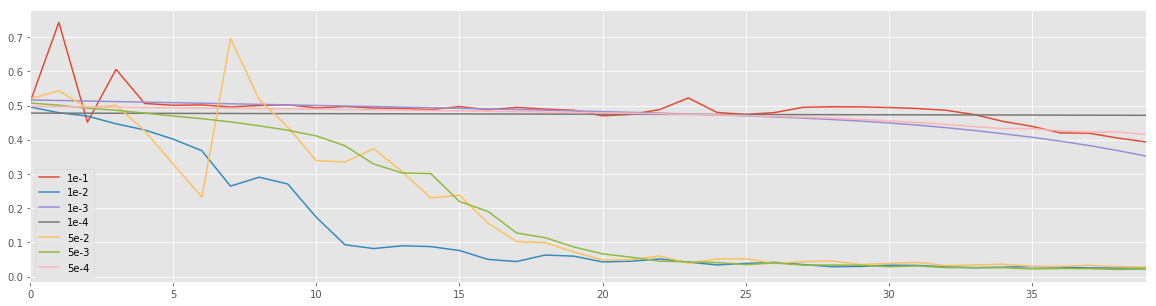

In [10]:
plot.plot(figsize=figsize)

# Load Up Trained Model

In [11]:
filename = "tflstm/iter64_1e-2"

In [12]:
m = b.TSModel(filename, timesteps=b.lstm_timesteps)

In [13]:
m.load(filename)

INFO:tensorflow:Restoring parameters from tflstm/iter64_1e-2


In [14]:
print(m)

0: Tensor("tflstm/iter64_1e-2/input/Placeholder:0", shape=(?, 100, 1), dtype=float32)

1: Tensor("tflstm/iter64_1e-2/lstm/rnn/transpose:0", shape=(?, 100, 1), dtype=float32)


#  Test Some Predictions

In [15]:
from singen import SinGen

In [16]:
g = SinGen(timesteps=b.lstm_timesteps)

In [17]:
x, y = g.batch()

In [18]:
y_ = m.predict(x)

In [19]:
res = pd.DataFrame({"predict": y_.squeeze(), "actual": y.squeeze()})

In [20]:
plt.style.use('ggplot')

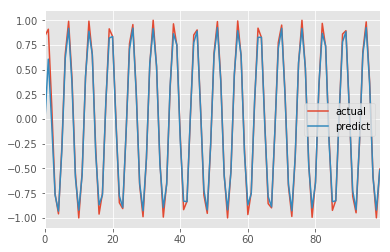

In [21]:
res.plot()

In [22]:
x, y = g.batch()
y_ = m.predict(x)
res = pd.DataFrame({"predict": y_.squeeze(), "actual": y.squeeze()})

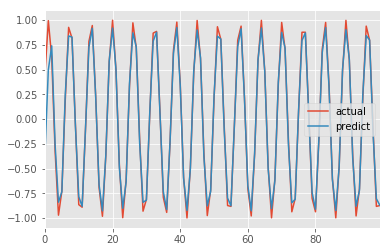

In [23]:
res.plot()

# See How Far It Can Run

In [24]:
figsize=(20, 5)

In [25]:
x, y = g.batch()

In [26]:
def gen_future(count):
    xs = []
    ys = []
    for _ in range(count):
        tx, ty = g.batch()
        xs += [i for i in tx.squeeze()]
        ys += [i for i in ty.squeeze()]
    return xs, ys

In [27]:
def pred_future(xs, count):
    timesteps = xs.shape[1]
    ys = []
    # Each time through this predict loop we get one future element
    for _ in range(count * timesteps):
        xs = m.predict(xs)
        ys += [[i for i in xs.squeeze()][-1]]  # The last one is the only thing new
    return ys

In [28]:
fx, fy = gen_future(2)

In [29]:
pfy = pred_future(x, 2)

# Here is what this looks like ...

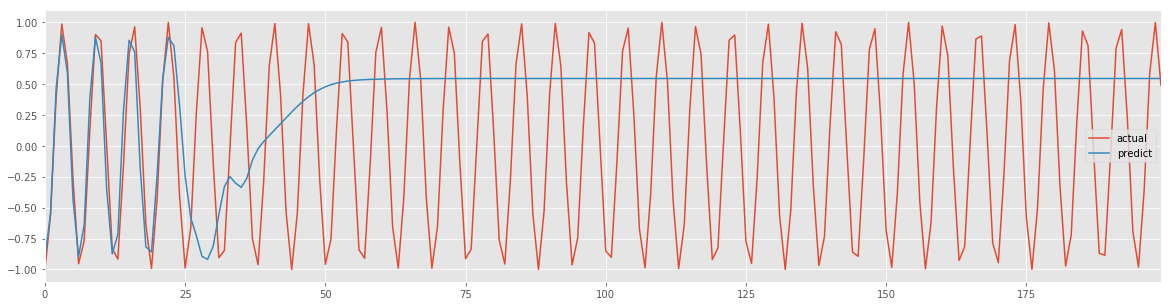

In [30]:
pd.DataFrame({'predict': pfy, 'actual': fx}).plot(figsize=figsize)

In [31]:
showpoints=10

In [32]:
pd.DataFrame({'predict y':pfy[:showpoints], 'gen x':fx[:showpoints]})

,gen x,predict y
0,-0.999756,-0.912995
1,-0.558764,-0.539972
2,0.395953,0.470123
3,0.986633,0.900022
4,0.670207,0.592823
5,-0.262404,-0.430464
6,-0.953762,-0.894180
7,-0.768235,-0.637396
8,0.123603,0.382525
9,0.901801,0.881934
